In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
obst_val = 0

quat_dim = 500
map1 = np.ones((quat_dim, quat_dim)) * 255

In [110]:
border_width = 20

# Add border
map1[0:border_width] = obst_val
map1[:,0:border_width] = obst_val

In [111]:
partition_width = 40 # must be even 
partition_height = 350

map1[int(quat_dim-(partition_width/2)):quat_dim, 0:partition_height] = obst_val
map1[0:partition_height, int(quat_dim-(partition_width/2)):quat_dim] = obst_val

In [112]:
room_wall_width = 20 # must be even 
room_height = 300
door_size = 120

map1[int(room_height-(room_wall_width/2)):int(room_height+(room_wall_width/2)), 0:int(room_height+(room_wall_width/2))] = obst_val
map1[door_size:int(room_height+(room_wall_width/2)), int(room_height-(room_wall_width/2)):int(room_height+(room_wall_width/2))] = obst_val

In [113]:
# Rotate 90
map_90 = np.rot90(map1)

# Rotate 180 
map_180 = np.rot90(map1, 2)

# Rotate 270 
map_270 = np.rot90(map1, 3)

map_temp1 = np.append(map1, map_270, axis=1)
map_temp2 = np.append(map_90, map_180, axis = 1)

map1 = np.append(map_temp1, map_temp2, axis = 0)

In [114]:
# # Mirror X
# map_x =  map1[::-1,:]
# map1 = np.append(map1, map_x, axis=0)

# # Mirror Y
# map_y = map1[:,::-1]
# map1 = np.append(map1, map_y, axis=1)
def add_landmark(x,y,width,id):
    map1[x - int(width/2):x + int(width/2), y - int(width/2):y + int(width/2)] = id


In [115]:
# Add Landmarks

# Landmark 1
center_x = 900
center_y = 400
l_height = 80
landmark_id = 1

# map1[center_x - int(l_height/2):center_x + int(l_height/2), center_y - int(l_height/2):center_y + int(l_height/2)] = landmark_id

add_landmark(400,200,50,1)
add_landmark(500,500,50,2)
add_landmark(400,900,50,3)
add_landmark(900,400,50,4)
add_landmark(100,400,50,5)
## Landmark 2
# center_x = 600
# center_y = 200
# l_height = 80
# landmark_id = 2

# map1[center_x - int(l_height/2):center_x + int(l_height/2), center_y - int(l_height/2):center_y + int(l_height/2)] = landmark_id


Map Size:  (1000, 1000)


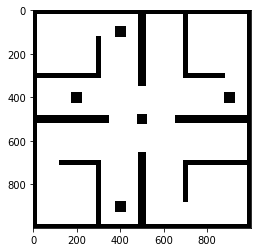

In [116]:
print("Map Size: ", map1.shape)
imgplot = plt.imshow(map1, cmap='gray')

# from PIL import Image
# im = Image.fromarray(map1)
# im.save("map1.png")

In [117]:
np.savetxt("map4.txt",map1,fmt="%s")